In [1]:
import pandas as pd
# Load the datasets
fraud_data = pd.read_csv('D:/week8&9 data/Fraud_Data.csv')

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

# Load the datasets
fraud_data = pd.read_csv('D:/week8&9 data/Fraud_Data.csv')
ip_to_country = pd.read_csv('D:/week8&9 data/IpAddress_to_Country.csv')
credit_card = pd.read_csv('D:/week8&9 data/creditcard.csv')

# Convert timestamps to datetime
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Extracting features from datetime columns
fraud_data['signup_to_purchase_time'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

# Drop the original datetime columns
fraud_data.drop(columns=['signup_time', 'purchase_time'], inplace=True)

# Identify categorical columns in fraud_data
categorical_columns = ['device_id', 'source', 'browser', 'sex']

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    fraud_data[col] = encoder.fit_transform(fraud_data[col])
    label_encoders[col] = encoder

# Separate features and target for fraud_data dataset
X_fraud = fraud_data.drop(columns=['class'])
y_fraud = fraud_data['class']

# Split fraud_data dataset
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    X_fraud, y_fraud, test_size=0.3, random_state=42, stratify=y_fraud)

# Define the scaler
scaler = StandardScaler()

# Scale the features for Fraud Data dataset
X_train_fraud_scaled = scaler.fit_transform(X_train_fraud)
X_test_fraud_scaled = scaler.transform(X_test_fraud)

# Define the Random Forest model
rf_fraud = RandomForestClassifier()

# Train the model
rf_fraud.fit(X_train_fraud_scaled, y_train_fraud)


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RandomForestClassifier()

In [4]:
# Convert to DataFrame for sampling
X_train_fraud_scaled_df = pd.DataFrame(X_train_fraud_scaled, columns=X_train_fraud.columns)

# Sample a smaller fraction of the training data for the background distribution
background_data = shap.sample(X_train_fraud_scaled_df, nsamples=100)

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(rf_fraud.predict, background_data)

# Sample a smaller fraction of the test data
X_test_fraud_scaled_df = pd.DataFrame(X_test_fraud_scaled, columns=X_test_fraud.columns)
sampled_data = X_test_fraud_scaled_df.sample(frac=0.01, random_state=42)

# Calculate SHAP values for the sampled data
shap_values = explainer.shap_values(sampled_data)


100%|██████████| 453/453 [1:57:51<00:00, 15.61s/it]  


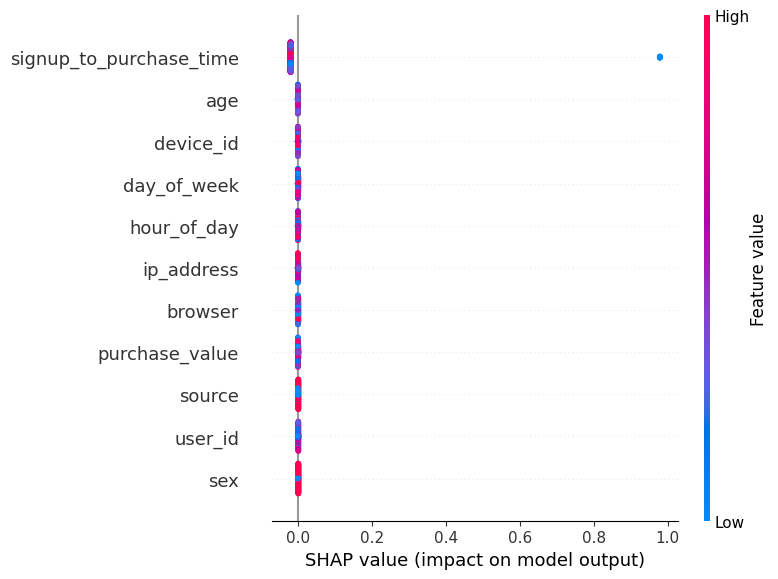

In [5]:
# Generate the summary plot
shap.summary_plot(shap_values, sampled_data)


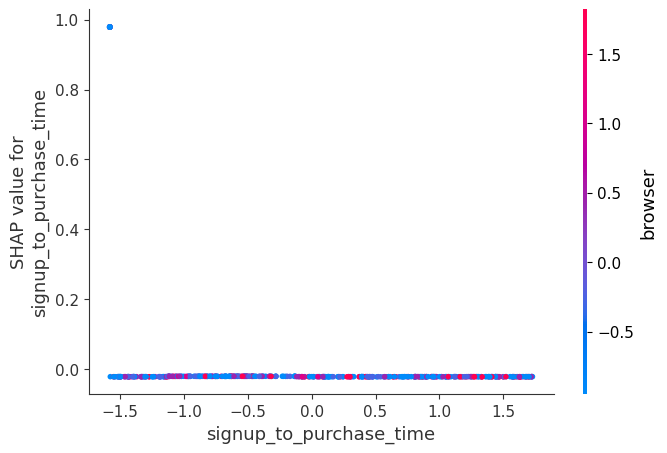

In [9]:
# Generate the dependence plot
shap.dependence_plot("signup_to_purchase_time", shap_values, sampled_data)
